<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/case_studu_data_aquisationi_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
d=pd.read_csv('/content/Wprld population growth rate by cities 2024.csv')
df=pd.DataFrame(d)


dataset[link text](https://drive.google.com/file/d/1AJ-wv51T9f0e7IDFpHLTuhJcH2H5O0Ce/view?usp=drive_link)

Q2

In [12]:
#1
df.head()


,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [13]:
#2
df.describe()


,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


Q3

In [15]:
#1 : What is the size of the dataset? (Number of rows and columns)

df.shape


(801, 6)

In [16]:
#2  What are the data types of each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [17]:
#3 : Are there any missing values in the dataset? If so, which columns have missing values and how many?
df.isnull().sum()

,0
City,0
Country,0
Continent,11
Population (2024),0
Population (2023),0
Growth Rate,0


In [22]:
#4 What are the unique values in a categorical column of your choice? How many unique values are there?

unique=pd.DataFrame(df['Continent'].unique())
print(unique)
#Found that there are 8 unique values in continent column with one being a 'nan' value


               0
0           Asia
1  South America
2         Africa
3  North America
4         Europe
5         Oceana
6            NaN
7        Oceania


In [35]:
#5 For a numerical column of your choice, calculate the mean, median, and standard deviation.

d={'Mean': df['Growth Rate'].mean(),
  'Median':df['Growth Rate'].median(),
  'Standard Deviation':df['Growth Rate'].std()}
stats=pd.DataFrame(d,index=[0])
print(stats)

       Mean  Median  Standard Deviation
0  0.020051  0.0197             0.01218


In [36]:
#6 Identify any potential outliers in a numerical column of your choice. Explain your approach.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Growth Rate'].quantile(0.25)
Q3 = df['Growth Rate'].quantile(0.75)
# Calculate IQR
IQR=Q3-Q1
# Determine the bounds for outliers
lower_bound=Q1-1.5*IQR
UPPER_BOUND=Q3+1.5*IQR
#Finding Outlier
outliers=df[(df['Growth Rate']<lower_bound) | (df['Growth Rate']>UPPER_BOUND)]
print(outliers)

               City        Country      Continent  Population (2024)  \
47    Dar Es Salaam       Tanzania         Africa            8161231   
48         New York  United States  North America            7931147   
113         Kampala         Uganda         Africa            4050826   
116           Abuja        Nigeria         Africa            4025735   
129     Los Angeles  United States  North America            3748640   
146     Ouagadougou   Burkina Faso            NaN            3358934   
199         Chicago  United States  North America            2590002   
226          Aleppo          Syria           Asia            2317650   
355    Philadelphia  United States  North America            1533916   
395             Uyo        Nigeria         Africa            1393453   
403          Mwanza       Tanzania         Africa            1378014   
429   Abomey Calavi          Benin         Africa            1314916   
436           Nnewi        Nigeria         Africa            130

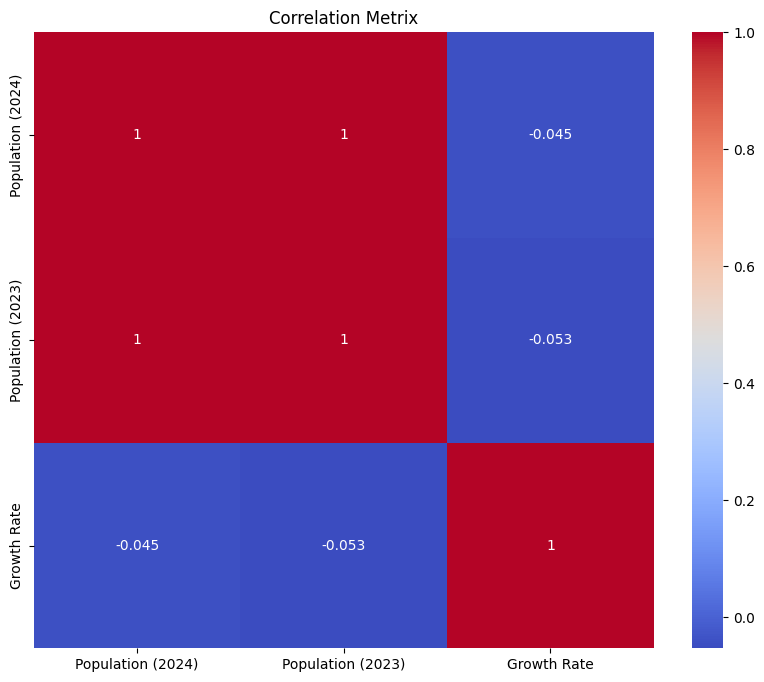

In [44]:
#7 : Find the correlation between numerical columns and discuss any interesting relationships.
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df=df.select_dtypes(include=['float64','int64'])
correlation_metrix=numerical_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_metrix,annot=True,cmap='coolwarm')
plt.title('Correlation Metrix')
plt.show()

The above fig depicts the correlation between numerical columns in the database.
#findings#


1.  There is a high correlation between Population(2023) and Polulation(2024)
2.   But the data shows there exists low correlation between growth rate compared with both the population columns.
3. This may have occured due to both population being from 2 concecutive years







In [52]:
#8 : Group the data by a categorical column and compute the aggregate statistics (e.g., mean, sum) for a numerical column.

group=df.groupby('Continent')['Growth Rate'].mean()
group_df=pd.DataFrame(group)
print(group_df)


               Growth Rate
Continent                 
Africa            0.034478
Asia              0.021123
Europe            0.003849
North America     0.010619
Oceana            0.013900
Oceania           0.011400
South America     0.011276


#Findings

Based on the avg Growth rate of different continents we found out that

1.   African continent have the highest average growth rate in population followed by asia
2.   North America has the lowest average growth rate

